In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [5]:
print(train_data[0])
print(train_labels[0]) # 0 or 1 for bad vs good movies

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [6]:
print(np.max(np.max(train_data)))

9995


In [7]:
word_index = imdb.get_word_index()

In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [9]:
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # - 3 because 3 placeholders
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:
def vectorize_sequences(sequences, dimension=10000): # dimension is the number of words in the vocabulary
    '''function to return all sequences in arrays of same dimension'''
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # puts 1 at word location when it occurs in the review
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train[0])
print(x_train.shape)

[ 0.  1.  1. ...,  0.  0.  0.]
(25000, 10000)


In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
print(y_train[4])

0.0


In [14]:
from keras import models
from keras import layers

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid good for binary outputs

In [31]:
from keras import losses
from keras import optimizers
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    partial_x_train, partial_y_train,
    epochs=5, batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 4s 271us/step - loss: 0.4834 - acc: 0.7800 - val_loss: 0.3696 - val_acc: 0.8447
Epoch 2/5
15000/15000 [==============================] - 4s 247us/step - loss: 0.2646 - acc: 0.9032 - val_loss: 0.2816 - val_acc: 0.8849
Epoch 3/5
15000/15000 [==============================] - 4s 249us/step - loss: 0.1899 - acc: 0.9329 - val_loss: 0.2959 - val_acc: 0.8814
Epoch 4/5
15000/15000 [==============================] - 4s 248us/step - loss: 0.1416 - acc: 0.9501 - val_loss: 0.3911 - val_acc: 0.8575
Epoch 5/5
15000/15000 [==============================] - 4s 247us/step - loss: 0.1190 - acc: 0.9577 - val_loss: 0.3116 - val_acc: 0.8870


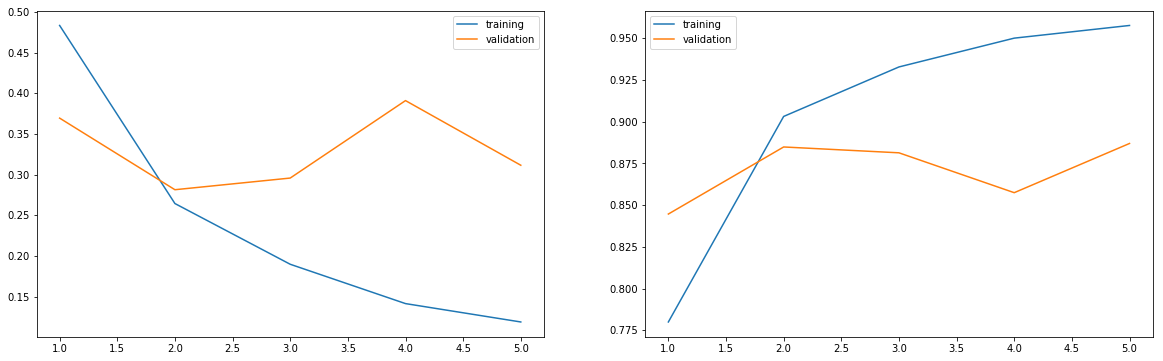

In [34]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values)
plt.plot(epochs, val_loss_values)
plt.legend(['training', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values)
plt.plot(epochs, val_acc_values)
plt.legend(['training', 'validation'])